# Exploring the data
Let's import pandas and the db_utils code we've written.

In [1]:
import db_utils as dbu
import pandas as pd

Now we can set up a dataframe from the csv file.

In [2]:
df = dbu.csv_to_df('loan_payments.csv')

Let's have a quick look at the data.

In [3]:
print(df.head())

         id  member_id  loan_amount  funded_amount  funded_amount_inv  \
0  38676116   41461848         8000         8000.0             8000.0   
1  38656203   41440010        13200        13200.0            13200.0   
2  38656154   41439961        16000        16000.0            16000.0   
3  38656128   41439934        15000        15000.0            15000.0   
4  38656121   41439927        15000        15000.0            15000.0   

        term  int_rate  instalment grade sub_grade  ... recoveries  \
0  36 months      7.49      248.82     A        A4  ...        0.0   
1  36 months      6.99      407.52     A        A3  ...        0.0   
2  36 months      7.49      497.63     A        A4  ...        0.0   
3  36 months     14.31      514.93     C        C4  ...        0.0   
4  36 months      6.03      456.54     A        A1  ...        0.0   

  collection_recovery_fee  last_payment_date last_payment_amount  \
0                     0.0           Jan-2022              248.82   
1   

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 54231 entries, 0 to 54230
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           54231 non-null  int64  
 1   member_id                    54231 non-null  int64  
 2   loan_amount                  54231 non-null  int64  
 3   funded_amount                51224 non-null  float64
 4   funded_amount_inv            54231 non-null  float64
 5   term                         49459 non-null  object 
 6   int_rate                     49062 non-null  float64
 7   instalment                   54231 non-null  float64
 8   grade                        54231 non-null  object 
 9   sub_grade                    54231 non-null  object 
 10  employment_length            52113 non-null  object 
 11  home_ownership               54231 non-null  object 
 12  annual_inc                   54231 non-null  float64
 13  verification_status  

We can see that 'term' is an object when it makes more sense for it just to be the number of months.  We can use the DataTransform class to fix this.  Let's create an instance of the class with the dataframe.

In [5]:
transform = dbu.DataTransform(df)

We can now split off the number of months as a new column.

In [6]:
transform.extract_numerical('term')

Column 'term_numerical' created with numerical values extracted from 'term'.


Let's check it worked.  

In [7]:
df.head()

,id,member_id,loan_amount,funded_amount,funded_amount_inv,term,int_rate,instalment,grade,sub_grade,...,collection_recovery_fee,last_payment_date,last_payment_amount,next_payment_date,last_credit_pull_date,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,term_numerical
0,38676116,41461848,8000,8000.0,8000.0,36 months,7.49,248.82,A,A4,...,0.0,Jan-2022,248.82,Feb-2022,Jan-2022,0.0,5.0,1,INDIVIDUAL,36
1,38656203,41440010,13200,13200.0,13200.0,36 months,6.99,407.52,A,A3,...,0.0,Jan-2022,407.52,Feb-2022,Jan-2022,0.0,NaN,1,INDIVIDUAL,36
2,38656154,41439961,16000,16000.0,16000.0,36 months,7.49,497.63,A,A4,...,0.0,Oct-2021,12850.16,NaN,Oct-2021,0.0,NaN,1,INDIVIDUAL,36
3,38656128,41439934,15000,15000.0,15000.0,36 months,14.31,514.93,C,C4,...,0.0,Jun-2021,13899.67,NaN,Jun-2021,0.0,NaN,1,INDIVIDUAL,36
4,38656121,41439927,15000,15000.0,15000.0,36 months,6.03,456.54,A,A1,...,0.0,Jan-2022,456.54,Feb-2022,Jan-2022,0.0,NaN,1,INDIVIDUAL,36


Next let's try to format all the date columns as dates. 

In [8]:
transform.format_to_date("last_payment_date")
transform.format_to_date("issue_date")
transform.format_to_date("earliest_credit_line")
transform.format_to_date("next_payment_date")
transform.format_to_date("last_credit_pull_date")

Column 'last_payment_date' converted to datetime format.
Column 'issue_date' converted to datetime format.
Column 'earliest_credit_line' converted to datetime format.
Column 'next_payment_date' converted to datetime format.
Column 'last_credit_pull_date' converted to datetime format.


/home/barney/aicore/eda_projects/customer_loans_in_finance/exploratory-data-analysis---customer-loans-in-finance635/db_utils.py:99: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  self.data_frame[column] = pd.to_datetime(self.data_frame[column])
/home/barney/aicore/eda_projects/customer_loans_in_finance/exploratory-data-analysis---customer-loans-in-finance635/db_utils.py:99: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  self.data_frame[column] = pd.to_datetime(self.data_frame[column])
/home/barney/aicore/eda_projects/customer_loans_in_finance/exploratory-data-analysis---customer-loans-in-finance635/db_utils.py:99: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `d

Now let's create an instance of the DataFrameInfo class from du_utils and test some of the methods.

In [28]:
df_info = dbu.DataFrameInfo(df)

In [10]:
df_info.describe_columns()

Column Descriptions:
 id                                      int64
member_id                               int64
loan_amount                             int64
funded_amount                         float64
funded_amount_inv                     float64
term                                   object
int_rate                              float64
instalment                            float64
grade                                  object
sub_grade                              object
employment_length                      object
home_ownership                         object
annual_inc                            float64
verification_status                    object
issue_date                     datetime64[ns]
loan_status                            object
payment_plan                           object
purpose                                object
dti                                   float64
delinq_2yrs                             int64
earliest_credit_line           datetime64[ns]
inq_last_6mt

In [11]:
df_info.count_distinct_values()

Distinct Values Count:
term: 2 distinct values
grade: 7 distinct values
sub_grade: 35 distinct values
employment_length: 11 distinct values
home_ownership: 5 distinct values
verification_status: 3 distinct values
loan_status: 9 distinct values
payment_plan: 2 distinct values
purpose: 14 distinct values
application_type: 1 distinct values


This shows that payment plan should probably be formatted to Boolean.  Application type won't tell us a lot in the context of this table only as all the values are the same.

In [12]:
df_info.print_shape()

Shape of the DataFrame: (54231, 44)


In [13]:
df_info.null_values_count()

NULL Values Count and Percentage:
                              null_count  null_percentage
id                                    0         0.000000
member_id                             0         0.000000
loan_amount                           0         0.000000
funded_amount                      3007         5.544799
funded_amount_inv                     0         0.000000
term                               4772         8.799395
int_rate                           5169         9.531449
instalment                            0         0.000000
grade                                 0         0.000000
sub_grade                             0         0.000000
employment_length                  2118         3.905515
home_ownership                        0         0.000000
annual_inc                            0         0.000000
verification_status                   0         0.000000
issue_date                            0         0.000000
loan_status                           0         0.000

This result is interesting as it shows large chunks of missing data for some variables.  The descision on how we handle the missing data will require more information.

In [14]:
df_info.extract_statistics()

Statistics:



Numerical Columns:
Median:
 id                             7084590.00
member_id                      8709873.00
loan_amount                      12000.00
funded_amount                    12000.00
funded_amount_inv                11300.00
int_rate                            13.16
instalment                         347.15
annual_inc                       61000.00
dti                                 15.60
delinq_2yrs                          0.00
inq_last_6mths                       1.00
mths_since_last_delinq              31.00
mths_since_last_record              87.00
open_accounts                       10.00
total_accounts                      23.00
out_prncp                            0.00
out_prncp_inv                        0.00
total_payment                    10113.25
total_payment_inv                 9835.83
total_rec_prncp                   7644.92
total_rec_int                     1734.64
total_rec_late_fee                   0.00
recoveries                           0.00
colle

Let's try to investigate the columns with Null values.  They are:
- funded_amount, 6%
- term, 9%
- int_rate, 10%
- employment length, 4%
- mths_since_last_delinq, 57%
- mths_since_last_record, 89%
- last_payment_date, 0.1%
- next_payment_date, 60%
- last_credit_pull_date, 0.01%
- colections_12_mths_ex_med, 0.1%
- mths_since_last_major_derog, 86%

The easy ones are the ones above 50%, we are missing more than half the data so these columns won't be able to tell us a lot.  We'll delete the columns.  Next let's consider term.  We've seen from previous analysis that there are only two terms.  Let's look at the distribution as we might be able to just impute the mode the proportion is significantly high.

In [15]:
df.term.value_counts()

term
36 months    35845
60 months    13614
Name: count, dtype: int64

We can see that there is a ratio of about 3:1.  We should either impute 36 months or 60 months but without a high ratio, we can't say which at this stage.  We could look to see if there's correlation between term and any other variable.

In [16]:
my_plot = dbu.Plotter(df)

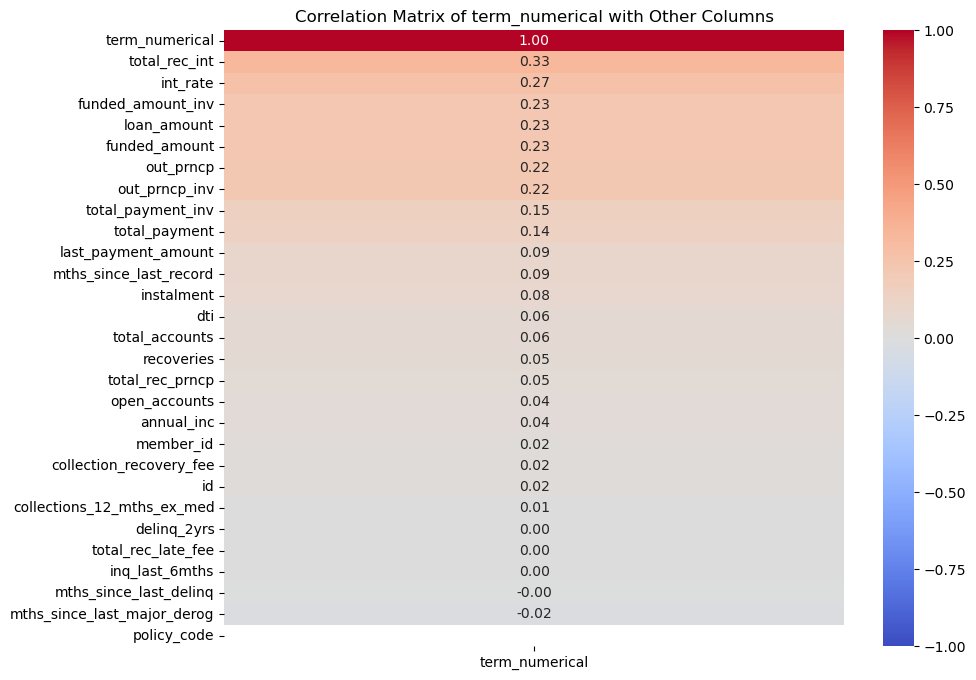

In [17]:
my_plot.plot_correlation_matrix('term_numerical')

This shows that no other column appears to be a good indicator of whether the row should have a 36 month term or a 60 months term and suggests we can inpute the data without risk of distorting it.  I think the most sensible thing to do is to drop the rows with missing data for this variable.  Let's remove the rows and columns we've discussed and check the Null values again.

In [23]:
df = df.drop(columns=['mths_since_last_record', 'next_payment_date', 'mths_since_last_major_derog', 'mths_since_last_delinq'])

In [27]:
df = df.dropna(subset=['term']) 

In [29]:
df_info.null_values_count()

NULL Values Count and Percentage:
                             null_count  null_percentage
id                                   0         0.000000
member_id                            0         0.000000
loan_amount                          0         0.000000
funded_amount                     2739         5.537920
funded_amount_inv                    0         0.000000
term                                 0         0.000000
int_rate                          4702         9.506864
instalment                           0         0.000000
grade                                0         0.000000
sub_grade                            0         0.000000
employment_length                 1919         3.879981
home_ownership                       0         0.000000
annual_inc                           0         0.000000
verification_status                  0         0.000000
issue_date                           0         0.000000
loan_status                          0         0.000000
payment_plan 

We've go the following left:

- funded_amount, 6%
- int_rate, 10%
- employment length, 4%
- last_payment_date, 0.1%
- last_credit_pull_date, 0.01%
- colections_12_mths_ex_med, 0.1%

Let's look at funded_amount next.

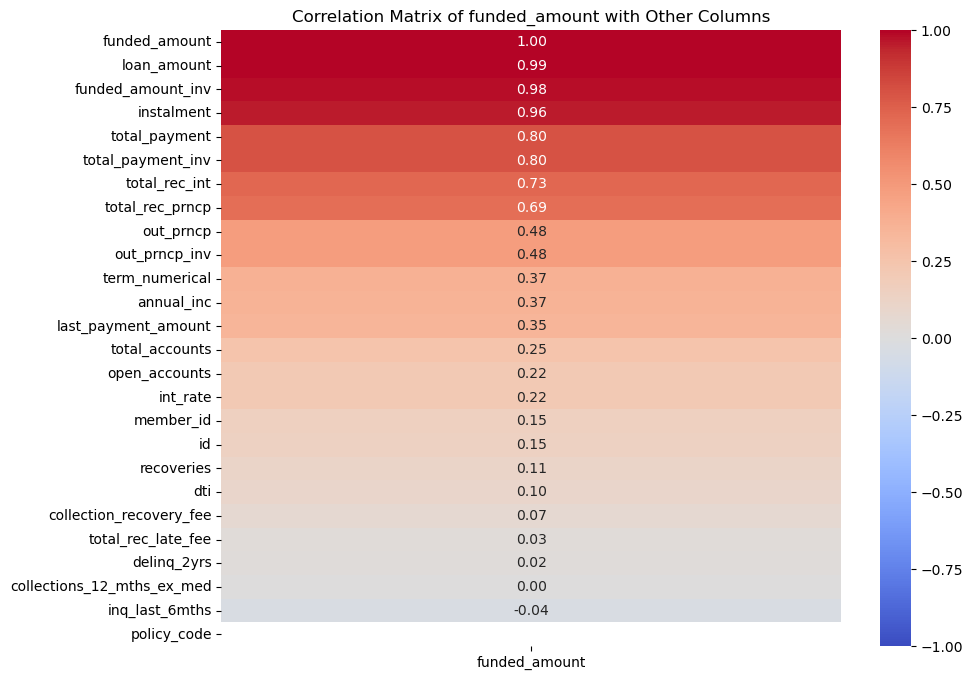

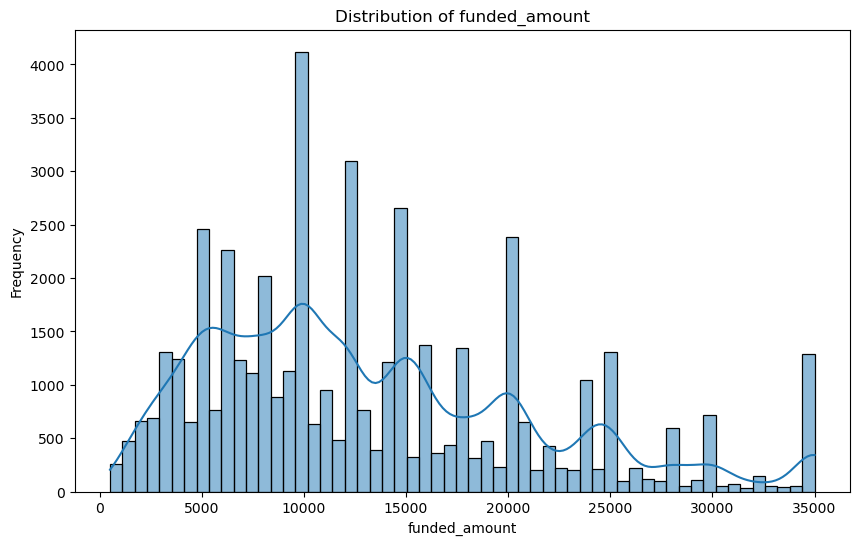

In [32]:
my_plot = dbu.Plotter(df)
my_plot.plot_correlation_matrix('funded_amount')
my_plot.plot_distribution('funded_amount')

Excellent, the funded_amount shows almost perfect correlation with the loan_amount so we should be able to use loan_amount to predict funded_amount.  Let's get an regression equation to turn into a function we can map onto the Null values from the loan_amount values.